# Aunalytics Data Science Exercise Problem 2

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy.stats import t
import math

In [3]:
#Custom two-sample CI function
def TwoSampCI(group1, group2, alpha = 0.05):
    m1 = group1.mean()
    m2 = group2.mean()
    sd1 = group1.std()
    sd2 = group2.std()
    n1 = len(group1)
    n2 = len(group2)
    df = math.ceil((sd1 + sd2)**2 / ((sd1**2/(n1 - 1)) + (sd2**2/(n2 - 1))))
    CIl = round((m1 - m2) - t.ppf(1 - (alpha)/2, df)*np.sqrt(sd1**2/n1 + sd2**2/n2), 4)
    CIu = round((m1 - m2) + t.ppf(1 - (alpha)/2, df)*np.sqrt(sd1**2/n1 + sd2**2/n2), 4)
    print("A "+str((1-alpha)*100)+"% two-sample CI is ("+str(CIl)+","+str(CIu)+")")

In [4]:
#Reading in the training data (I will pretend the training data is our collected data)
au_train = pd.read_csv("au_train.csv")
au_train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


The purpose of this segmentation study will to be to identify different traits and characteristics from the sampled population of people who make $\le$ 50K or >50K. There are multiple ways to look at how to begin dividing up people, so I will start with looking into how a person's gender affects whether a person makes $\le$ 50K or > 50K.

## Gender

In [5]:
#Creating subsets
#Income class
le50k = au_train[au_train["class"] == " <=50K"]
g50k = au_train[au_train["class"] == " >50K"]
#Gender
m = au_train[au_train["sex"] == " Male"]
f = au_train[au_train["sex"] == " Female"]

Now let's take a look at some breakdowns starting with the variable of interest.

In [6]:
print(m["class"].value_counts())
print("The percentage of men who made ≤ 50K is "+str(round(15128/(15129 + 6662), 4))+".")
print(f["class"].value_counts())
print("The percentage of women who made ≤ 50K is "+str(round(9592/(9592 + 1179), 4))+".")

 <=50K    15128
 >50K      6662
Name: class, dtype: int64
The percentage of men who made ≤ 50K is 0.6942.
 <=50K    9592
 >50K     1179
Name: class, dtype: int64
The percentage of women who made ≤ 50K is 0.8905.


From a cursory glance, it would appear there is some income inequality going on. 69.42% of men make $\le$ 50K, while 89.05% of women make $\le$ 50K, almost a 20% difference. However, there are most likely some confounding variables here. One that comes to mind would be education. The more education one has, the more money they tend to make. Therefore I will look at the distribution of education next.

In [7]:
#Tables
#<=50K
le50k["education"].value_counts(normalize=True)

 HS-grad         0.357039
 Some-college    0.238835
 Bachelors       0.126780
 11th            0.045105
 Assoc-voc       0.041303
 10th            0.035235
 Assoc-acdm      0.032443
 Masters         0.030906
 7th-8th         0.024515
 9th             0.019701
 12th            0.016181
 5th-6th         0.012824
 1st-4th         0.006553
 Prof-school     0.006189
 Doctorate       0.004328
 Preschool       0.002063
Name: education, dtype: float64

In [8]:
#>50k
g50k["education"].value_counts(normalize=True)

 Bachelors       0.283255
 HS-grad         0.213621
 Some-college    0.176891
 Masters         0.122306
 Prof-school     0.053947
 Assoc-voc       0.046040
 Doctorate       0.039026
 Assoc-acdm      0.033797
 10th            0.007907
 11th            0.007652
 7th-8th         0.005101
 12th            0.004209
 9th             0.003443
 5th-6th         0.002041
 1st-4th         0.000765
Name: education, dtype: float64

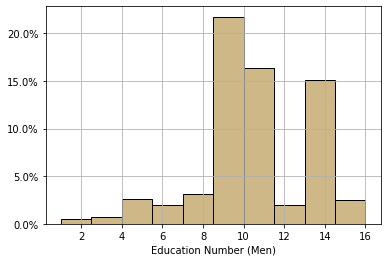

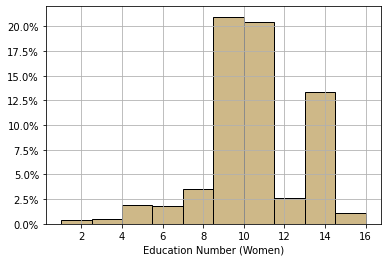

In [9]:
#Men
m["education-num"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Education Number (Men)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Women
f["education-num"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Education Number (Women)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [10]:
#Table for Men
m["education"].value_counts(normalize=True)

 HS-grad         0.326342
 Some-college    0.205828
 Bachelors       0.171455
 Masters         0.054475
 Assoc-voc       0.040477
 11th            0.034098
 Assoc-acdm      0.029647
 10th            0.029279
 7th-8th         0.022304
 Prof-school     0.022212
 9th             0.016980
 Doctorate       0.015007
 12th            0.013263
 5th-6th         0.011427
 1st-4th         0.005599
 Preschool       0.001606
Name: education, dtype: float64

In [11]:
#Table for Women
f["education"].value_counts(normalize=True)

 HS-grad         0.314734
 Some-college    0.260514
 Bachelors       0.150311
 Masters         0.049763
 Assoc-voc       0.046421
 11th            0.040108
 Assoc-acdm      0.039086
 10th            0.027388
 7th-8th         0.014855
 9th             0.013369
 12th            0.013369
 Prof-school     0.008541
 Doctorate       0.007984
 5th-6th         0.007799
 1st-4th         0.004271
 Preschool       0.001485
Name: education, dtype: float64

It would appear that the distributions are similar, so education is not the reason for this. Therefore I will look at `occupation` next. Some jobs pay more than others so if there is a disparity in a person's occupation, that could lead to the income inequality above.

In [12]:
#Tables
#<=50K
le50k["occupation"].value_counts(normalize=True)

 Adm-clerical         0.131998
 Craft-repair         0.128236
 Other-service        0.127751
 Sales                0.107888
 Prof-specialty       0.092273
 Exec-managerial      0.084871
 Machine-op-inspct    0.070874
 ?                    0.066828
 Handlers-cleaners    0.051942
 Transport-moving     0.051659
 Farming-fishing      0.035558
 Tech-support         0.026092
 Protective-serv      0.017718
 Priv-house-serv      0.005987
 Armed-Forces         0.000324
Name: occupation, dtype: float64

In [13]:
#>50K
g50k["occupation"].value_counts(normalize=True)

 Exec-managerial      0.250988
 Prof-specialty       0.237087
 Sales                0.125367
 Craft-repair         0.118480
 Adm-clerical         0.064660
 Transport-moving     0.040811
 Tech-support         0.036092
 Machine-op-inspct    0.031884
 Protective-serv      0.026910
 ?                    0.024359
 Other-service        0.017472
 Farming-fishing      0.014666
 Handlers-cleaners    0.010968
 Armed-Forces         0.000128
 Priv-house-serv      0.000128
Name: occupation, dtype: float64

In [14]:
#Men
m["occupation"].value_counts(normalize=True)

 Craft-repair         0.177926
 Exec-managerial      0.133410
 Prof-specialty       0.120468
 Sales                0.109546
 Transport-moving     0.069160
 Other-service        0.068609
 Machine-op-inspct    0.066636
 Adm-clerical         0.056586
 Handlers-cleaners    0.055346
 ?                    0.045984
 Farming-fishing      0.042634
 Tech-support         0.026618
 Protective-serv      0.026296
 Armed-Forces         0.000413
 Priv-house-serv      0.000367
Name: occupation, dtype: float64

In [15]:
#Women
f["occupation"].value_counts(normalize=True)

 Adm-clerical         0.235540
 Other-service        0.167115
 Prof-specialty       0.140655
 Sales                0.117259
 Exec-managerial      0.107604
 ?                    0.078080
 Machine-op-inspct    0.051063
 Tech-support         0.032309
 Craft-repair         0.020611
 Handlers-cleaners    0.015226
 Priv-house-serv      0.013091
 Transport-moving     0.008356
 Protective-serv      0.007056
 Farming-fishing      0.006035
Name: occupation, dtype: float64

We now see a connection. The distribution for male occupations is closer to those who make >50K, while the distribution for female occupations is closer to those who make $\le$ 50K. One last thing out of curiosity is do we have disparity in the number of hours worked? We know that education for both men and women is about the same, but men tend to hold jobs that are more likely to pay more. That then raises the question, "Do men work more hours to earn that more money or not?"

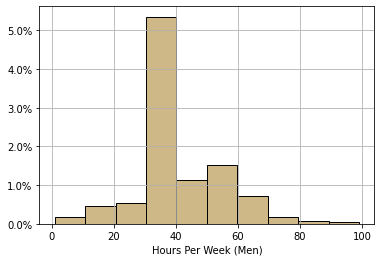

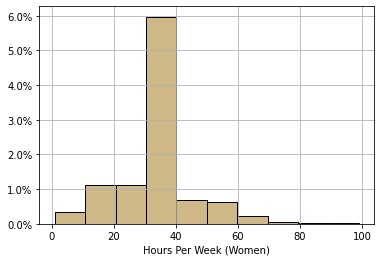

The average hours per week a man works is 42.4281 hours per week.
The average hours per week a woman works is 36.4104 hours per week.
A 95.0% two-sample CI is (5.7427,6.2928)


In [16]:
#Men
m["hours-per-week"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Hours Per Week (Men)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Women
f["hours-per-week"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Hours Per Week (Women)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Averages
#Male
print("The average hours per week a man works is "+str(round(m["hours-per-week"].mean(), 4))+" hours per week.")
#Female
print("The average hours per week a woman works is "+str(round(f["hours-per-week"].mean(), 4))+" hours per week.")
#CI for difference
TwoSampCI(m["hours-per-week"], f["hours-per-week"])

The histograms above appears to show that men work more hours than women, so I created a custom two-sample confidence interval function to compare the difference in means. Using it, we can say with 95% confidence that the true difference between the number of hours men worked versus the number of hours women worked is 5.7427 to 6.2928 hours per week more. This would give some supporting evidence for why men are more likely to make >50K than women.

So we now know that men are more likely to make >50K because they work in jobs that are more likely to pay >50K and in general work more hours. However, there is one more important factor that needs to be looked into, race.

## Race

Theoretically, it should not matter what a person's race is when looking at income levels. However, we know that this is unfortunately not the case.

In [18]:
au_train["race"].value_counts(normalize=True)

 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64

In [19]:
#Creating subsets
w = au_train[au_train["race"] == " White"]
b = au_train[au_train["race"] == " Black"]
api = au_train[au_train["race"] == " Asian-Pac-Islander"]
aie = au_train[au_train["race"] == " Amer-Indian-Eskimo"]
o = au_train[au_train["race"] == " Other"]

In [29]:
print(w["class"].value_counts())
print("The percentage of white people who made ≤ 50K is "+str(round(20699/(20699 + 7117), 4))+".")
print(b["class"].value_counts())
print("The percentage of black who made ≤ 50K is "+str(round(2737/(2737 + 387), 4))+".")
print(api["class"].value_counts())
print("The percentage of Asian/Pacific Islanders who made ≤ 50K is "+str(round(763/(763 + 276), 4))+".")
print(aie["class"].value_counts())
print("The percentage of American Indian/Eskimo who made ≤ 50K is "+str(round(275/(275 + 36), 4))+".")
print(o["class"].value_counts())
print("The percentage of 'Other' who made ≤ 50K is "+str(round(246/(246 + 25), 4))+".")

 <=50K    20699
 >50K      7117
Name: class, dtype: int64
The percentage of white people who made ≤ 50K is 0.7441.
 <=50K    2737
 >50K      387
Name: class, dtype: int64
The percentage of black who made ≤ 50K is 0.8761.
 <=50K    763
 >50K     276
Name: class, dtype: int64
The percentage of Asian/Pacific Islanders who made ≤ 50K is 0.7344.
 <=50K    275
 >50K      36
Name: class, dtype: int64
The percentage of American Indian/Eskimo who made ≤ 50K is 0.8842.
 <=50K    246
 >50K      25
Name: class, dtype: int64
The percentage of 'Other' who made ≤ 50K is 0.9077.


It would appear that we have some inequality here too. Whether a person makes $\le$ 50K or not does change depending on a person's race. I will again make distributions showing education for people of each race.

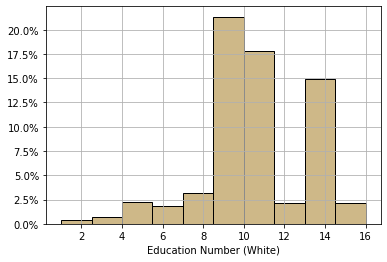

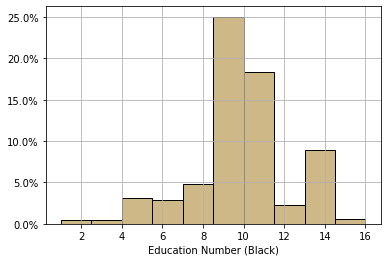

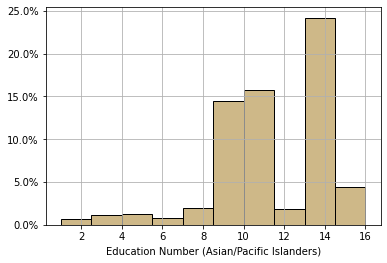

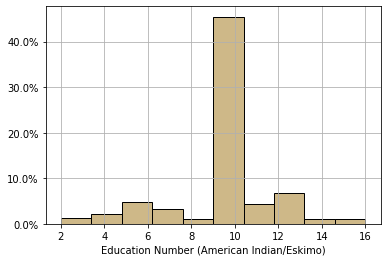

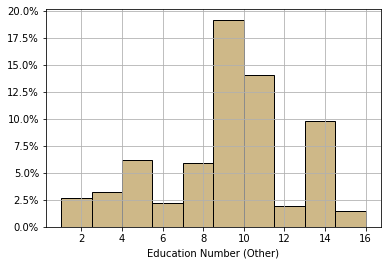

In [31]:
#White
w["education-num"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Education Number (White)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Black
b["education-num"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Education Number (Black)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Asian/Pacific Islanders
api["education-num"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Education Number (Asian/Pacific Islanders)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#American Indian/Eskimo
aie["education-num"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Education Number (American Indian/Eskimo)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Other
o["education-num"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Education Number (Other)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [32]:
#Table for White
w["education"].value_counts(normalize=True)

 HS-grad         0.320104
 Some-college    0.223145
 Bachelors       0.168320
 Masters         0.055256
 Assoc-voc       0.043392
 11th            0.035124
 Assoc-acdm      0.032895
 10th            0.027394
 7th-8th         0.019881
 Prof-school     0.018479
 9th             0.014488
 Doctorate       0.013266
 12th            0.012043
 5th-6th         0.010030
 1st-4th         0.004817
 Preschool       0.001366
Name: education, dtype: float64

In [33]:
#Table for Black
b["education"].value_counts(normalize=True)

 HS-grad         0.375800
 Some-college    0.238796
 Bachelors       0.105634
 11th            0.048976
 10th            0.042574
 Assoc-voc       0.035851
 Assoc-acdm      0.034251
 9th             0.028489
 Masters         0.027529
 12th            0.022407
 7th-8th         0.017926
 5th-6th         0.006722
 1st-4th         0.005122
 Prof-school     0.004802
 Doctorate       0.003521
 Preschool       0.001601
Name: education, dtype: float64

In [34]:
#Table for Asian/Pacific Islander
api["education"].value_counts(normalize=True)

 Bachelors       0.278152
 HS-grad         0.217517
 Some-college    0.200192
 Masters         0.084697
 Prof-school     0.039461
 Assoc-voc       0.036574
 Assoc-acdm      0.027911
 Doctorate       0.026949
 11th            0.020212
 5th-6th         0.017324
 10th            0.012512
 7th-8th         0.010587
 9th             0.008662
 12th            0.008662
 Preschool       0.005775
 1st-4th         0.004812
Name: education, dtype: float64

In [35]:
#Table for American Indian/Eskimo
aie["education"].value_counts(normalize=True)

 HS-grad         0.382637
 Some-college    0.254019
 Bachelors       0.067524
 Assoc-voc       0.061093
 10th            0.051447
 11th            0.045016
 7th-8th         0.028939
 Assoc-acdm      0.025723
 9th             0.016077
 Masters         0.016077
 12th            0.016077
 1st-4th         0.012862
 Doctorate       0.009646
 Prof-school     0.006431
 5th-6th         0.006431
Name: education, dtype: float64

In [36]:
#Table for Other
o["education"].value_counts(normalize=True)

 HS-grad         0.287823
 Some-college    0.188192
 Bachelors       0.121771
 7th-8th         0.062731
 12th            0.051661
 5th-6th         0.047970
 11th            0.036900
 10th            0.033210
 1st-4th         0.033210
 9th             0.029520
 Assoc-acdm      0.029520
 Masters         0.025830
 Assoc-voc       0.022140
 Prof-school     0.014760
 Doctorate       0.007380
 Preschool       0.007380
Name: education, dtype: float64

We can see from the histrograms that there is indeed differences for education levels here. While `HS-grad`, `Some-college`, and `Bachelors` are at the top for all levels, they are varrying in proportion greatly. Also, the groups after these three also vary greatly. For example, white people, next is `Masters` and `Assoc-voc`, but for black people, next are `11th` and `10th` which is a large gap in years of education. This is also even larger when comparing black people to Asian/Pacific Islanders who's next are `Masters` and `Doctorate`, which is an even larger gap in years of education than when compared to white people. I will now look at the breakdown for `occupation` to see if there is a difference in the distribution between races like there was between genders.

In [37]:
#Tables (again for convenience)
#<=50K
le50k["occupation"].value_counts(normalize=True)

 Adm-clerical         0.131998
 Craft-repair         0.128236
 Other-service        0.127751
 Sales                0.107888
 Prof-specialty       0.092273
 Exec-managerial      0.084871
 Machine-op-inspct    0.070874
 ?                    0.066828
 Handlers-cleaners    0.051942
 Transport-moving     0.051659
 Farming-fishing      0.035558
 Tech-support         0.026092
 Protective-serv      0.017718
 Priv-house-serv      0.005987
 Armed-Forces         0.000324
Name: occupation, dtype: float64

In [38]:
#>50K
g50k["occupation"].value_counts(normalize=True)

 Exec-managerial      0.250988
 Prof-specialty       0.237087
 Sales                0.125367
 Craft-repair         0.118480
 Adm-clerical         0.064660
 Transport-moving     0.040811
 Tech-support         0.036092
 Machine-op-inspct    0.031884
 Protective-serv      0.026910
 ?                    0.024359
 Other-service        0.017472
 Farming-fishing      0.014666
 Handlers-cleaners    0.010968
 Armed-Forces         0.000128
 Priv-house-serv      0.000128
Name: occupation, dtype: float64

In [39]:
#White
w["occupation"].value_counts(normalize=True)

 Craft-repair         0.132801
 Prof-specialty       0.131255
 Exec-managerial      0.131076
 Sales                0.116372
 Adm-clerical         0.110871
 Other-service        0.090703
 Machine-op-inspct    0.057916
 ?                    0.054465
 Transport-moving     0.048893
 Handlers-cleaners    0.040768
 Farming-fishing      0.032895
 Tech-support         0.028976
 Protective-serv      0.018658
 Priv-house-serv      0.004098
 Armed-Forces         0.000252
Name: occupation, dtype: float64

In [40]:
#Black
b["occupation"].value_counts(normalize=True)

 Other-service        0.182778
 Adm-clerical         0.156850
 Machine-op-inspct    0.087708
 Sales                0.081306
 Exec-managerial      0.078105
 Craft-repair         0.078105
 Prof-specialty       0.076504
 ?                    0.068822
 Handlers-cleaners    0.057298
 Transport-moving     0.054417
 Protective-serv      0.032650
 Tech-support         0.022727
 Farming-fishing      0.013444
 Priv-house-serv      0.008963
 Armed-Forces         0.000320
Name: occupation, dtype: float64

In [41]:
#Asian/Pacific Islander
api["occupation"].value_counts(normalize=True)

 Prof-specialty       0.179018
 Adm-clerical         0.133782
 Exec-managerial      0.129933
 Other-service        0.123195
 Sales                0.103946
 Craft-repair         0.085659
 ?                    0.062560
 Machine-op-inspct    0.056785
 Tech-support         0.042348
 Transport-moving     0.026949
 Handlers-cleaners    0.022137
 Farming-fishing      0.015399
 Protective-serv      0.014437
 Priv-house-serv      0.003850
Name: occupation, dtype: float64

In [42]:
#American Indian/Eskimo
aie["occupation"].value_counts(normalize=True)

 Craft-repair         0.141479
 Other-service        0.106109
 Prof-specialty       0.106109
 Adm-clerical         0.099678
 Exec-managerial      0.096463
 Sales                0.083601
 Transport-moving     0.080386
 ?                    0.080386
 Handlers-cleaners    0.070740
 Machine-op-inspct    0.061093
 Farming-fishing      0.032154
 Protective-serv      0.025723
 Tech-support         0.012862
 Armed-Forces         0.003215
Name: occupation, dtype: float64

In [43]:
#Other
o["occupation"].value_counts(normalize=True)

 Other-service        0.147601
 Machine-op-inspct    0.143911
 Prof-specialty       0.114391
 Craft-repair         0.103321
 Adm-clerical         0.095941
 Sales                0.092251
 ?                    0.084871
 Transport-moving     0.051661
 Handlers-cleaners    0.044280
 Exec-managerial      0.040590
 Farming-fishing      0.040590
 Protective-serv      0.018450
 Tech-support         0.011070
 Priv-house-serv      0.011070
Name: occupation, dtype: float64

When looking at the distribution of occupations between races, we notice a few things. The first is that the two races that proportionally have people who make >50K (`white` and `Asian-Pac-Islander`) have jobs that are more likely to pay out >50K such as `Prof-specialty` and `Exec-managerial`. The other three groups have `Other-service` as #1 or #2 which is more likely to pay out $\le$ 50K. Finally, I will do what I did before for genders and look at how many hours per week a person worked between the different groups.

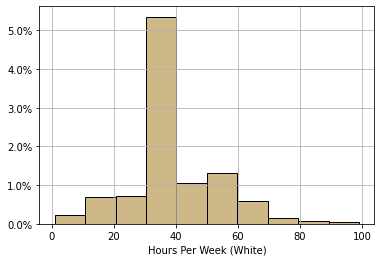

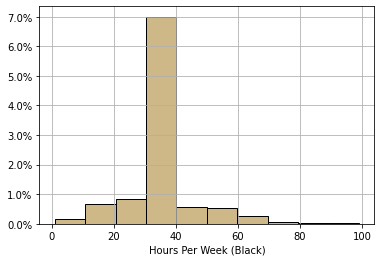

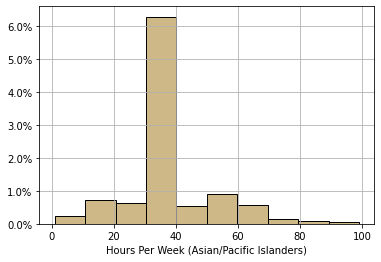

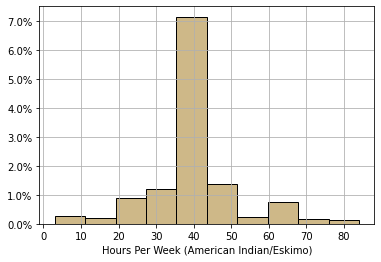

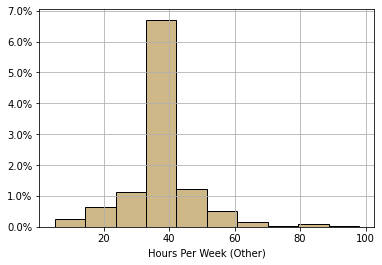

The average hours per week a 'white' person works is 40.6891 hours per week.
The average hours per week a 'black' person works is 38.4229 hours per week.
The average hours per week an 'Asian/Pacific Islander' person works is 40.127 hours per week.
The average hours per week an 'American Indian/Eskimo' person works is 40.0482 hours per week.
The average hours per week an 'other' person works is 39.4686 hours per week.


In [45]:
#White
w["hours-per-week"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Hours Per Week (White)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Black
b["hours-per-week"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Hours Per Week (Black)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Asian/Pacific Islanders
api["hours-per-week"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Hours Per Week (Asian/Pacific Islanders)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#American Indian/Eskimo
aie["hours-per-week"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Hours Per Week (American Indian/Eskimo)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Other
o["hours-per-week"].hist(edgecolor = "black", color = "#ceb888", density = True)
plt.xlabel("Hours Per Week (Other)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#Averages
#White
print("The average hours per week a 'white' person works is "+str(round(w["hours-per-week"].mean(), 4))+" hours per week.")
#Black
print("The average hours per week a 'black' person works is "+str(round(b["hours-per-week"].mean(), 4))+" hours per week.")
#Asian/Pacific Islander
print("The average hours per week an 'Asian/Pacific Islander' person works is "+str(round(api["hours-per-week"].mean(), 4))+" hours per week.")
#American Indian/Eskimo
print("The average hours per week an 'American Indian/Eskimo' person works is "+str(round(aie["hours-per-week"].mean(), 4))+" hours per week.")
#Other
print("The average hours per week an 'other' person works is "+str(round(o["hours-per-week"].mean(), 4))+" hours per week.")

The average hours between groups does not appear to be that different, so we can say there is a good chance that the difference in proportions is being caused by the difference in education and job types of the different races.